# **RUMUSAN MASALAH**

1. Bagaimana korelasi antar data score ?
2. Bagaimana perbedaan hasil tes antara laki-laki dan perempuan ?
3. Bagaimana pengaruh tingkat pendidikan orang tua terhadap hasil tes ?
4. Bagaimana pengaruh kursus pretest terhadap hasil akhir tes ?

# **IMPORT DATA AND UTILITIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
all_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/StudentsPerformance.csv')

Sebelum menganalisis lebih lanjut, akan dilihat dulu atribut-atribut pada dataset.

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB




---


# **ANALYSIS ALL STUDENTS PERFORMANCE**

## **Summary Statistics Of All Students Data**

In [ ]:
all_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Text(0.5, 1.0, 'Summary Statistics')

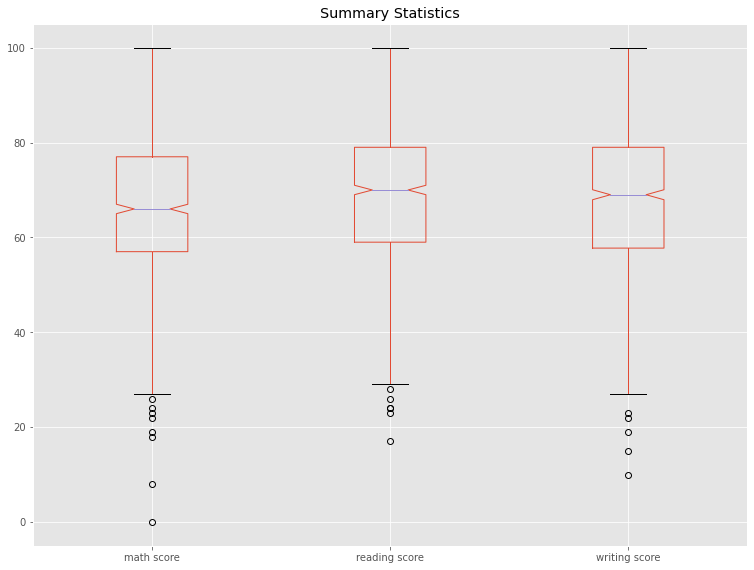

In [ ]:
plt.figure(figsize=[12.8, 9.6])
all_df.boxplot(column=['math score', 'reading score', 'writing score'], 
               notch=True)
plt.title('Summary Statistics', color='black')

## **Visualizing All Data**

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


Text(0.5, 1.0, 'Race/Ethnicity')

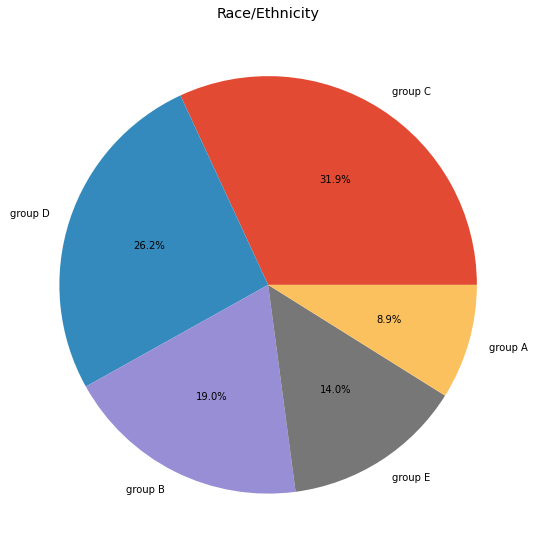

In [ ]:
race_element = all_df['race/ethnicity'].value_counts()
print(race_element)

plt.figure(figsize=[9.6, 9.6])
plt.pie(race_element.values, labels=race_element.index, autopct='%1.1f%%')
plt.title('Race/Ethnicity', color='black')

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


Text(0.5, 1.0, 'Parental Level Of Education')

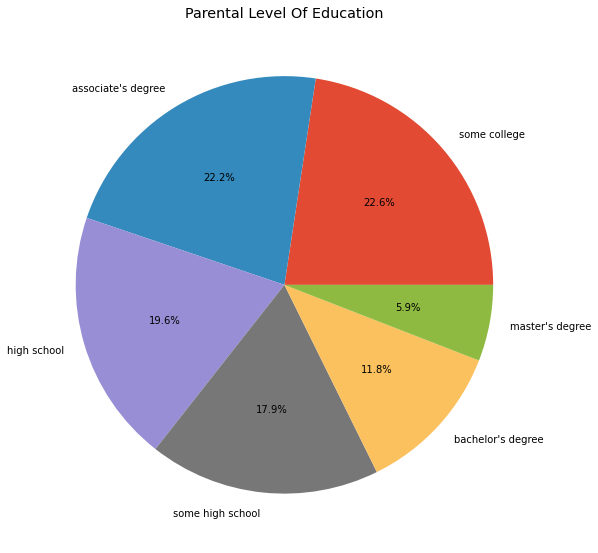

In [ ]:
edu_element = all_df['parental level of education'].value_counts()
print(edu_element)

plt.figure(figsize=[9.6, 9.6])
plt.pie(edu_element.values, labels=edu_element.index, autopct='%1.1f%%')
plt.title('Parental Level Of Education', color='black')

standard        645
free/reduced    355
Name: lunch, dtype: int64


Text(0.5, 1.0, 'Lunch')

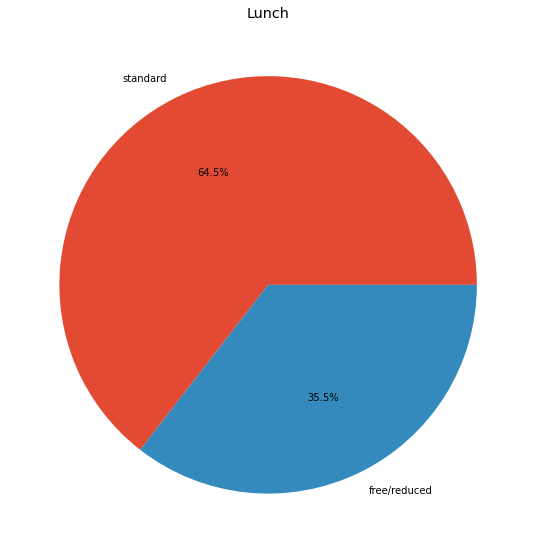

In [ ]:
lunch_element = all_df['lunch'].value_counts()
print(lunch_element)

plt.figure(figsize=[9.6, 9.6])
plt.pie(lunch_element.values, labels=lunch_element.index, autopct='%1.1f%%')
plt.title('Lunch', color='black')

none         642
completed    358
Name: test preparation course, dtype: int64


Text(0.5, 1.0, 'Test Preparation Course')

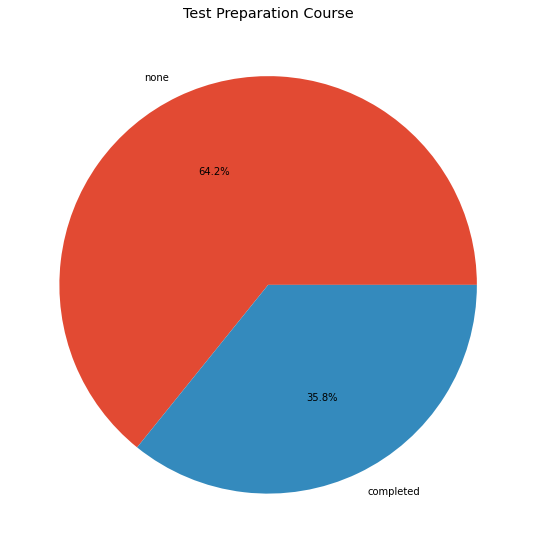

In [ ]:
test_element = all_df['test preparation course'].value_counts()
print(test_element)

plt.figure(figsize=[9.6, 9.6])
plt.pie(test_element.values, labels=test_element.index, autopct='%1.1f%%')
plt.title('Test Preparation Course', color='black')

## Correlation Between Test Scores

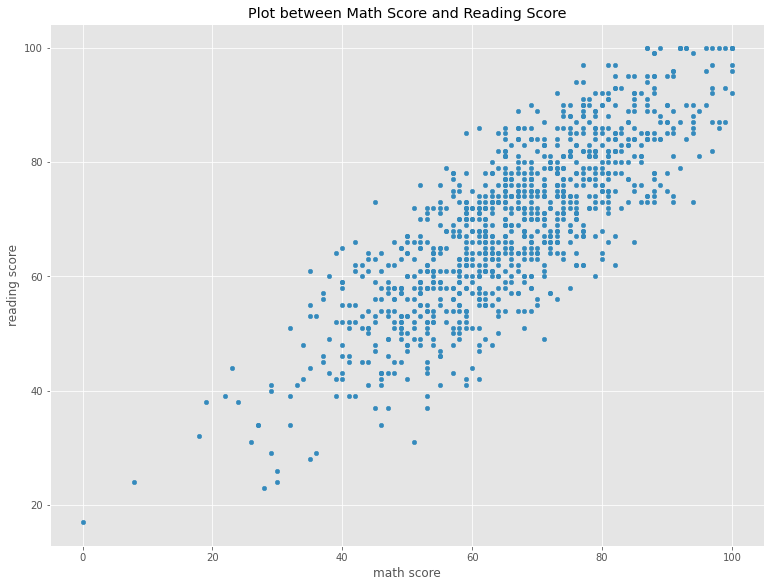

In [ ]:
all_df.plot(kind='scatter', x='math score', y='reading score', 
            title='Plot between Math Score and Reading Score',
            figsize=[12.8, 9.6])

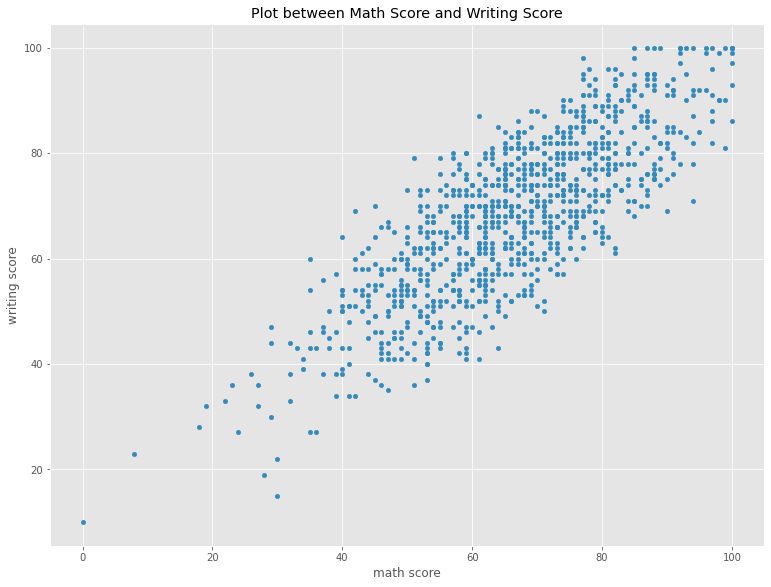

In [ ]:
all_df.plot(kind='scatter', x='math score', y='writing score', 
            title='Plot between Math Score and Writing Score',
            figsize=[12.8, 9.6])

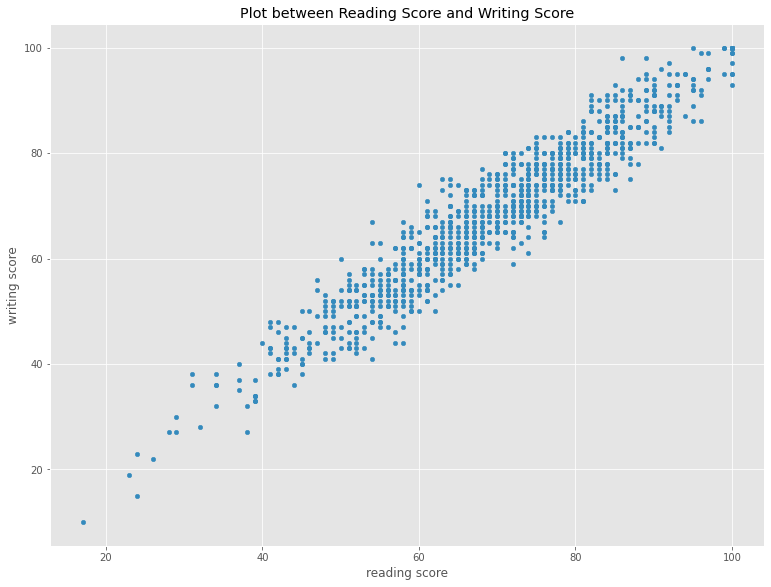

In [ ]:
all_df.plot(kind='scatter', x='reading score', y='writing score', 
            title='Plot between Reading Score and Writing Score',
            figsize=[12.8, 9.6])

**Correlation Analysis of All Data**

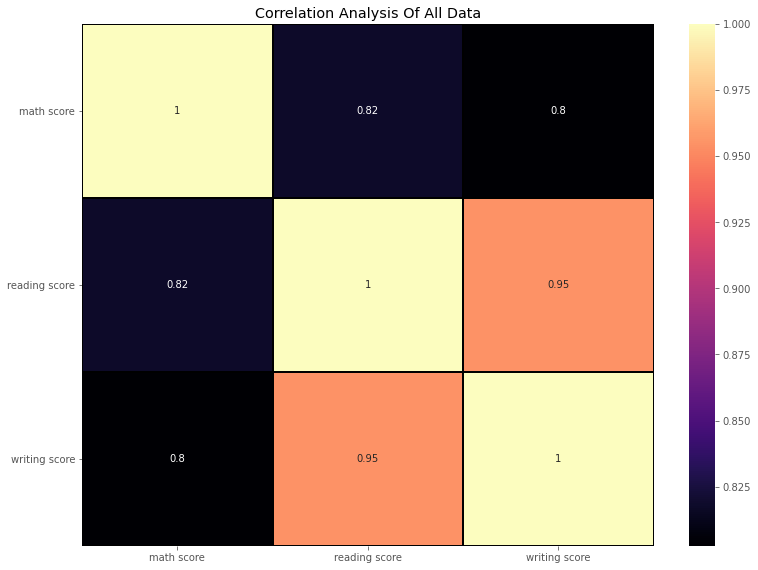

In [ ]:
plt.figure(figsize=[12.8, 9.6])
plt.title("Correlation Analysis Of All Data", color='black')
sns.heatmap(all_df.corr(), annot=True, linewidth=1, linecolor='black', cmap='magma')
plt.xticks()
plt.yticks(rotation=0)
plt.show()



---


# **ANALYSIS STUDENTS PERFORMANCE BASED ON GENDER**

In [ ]:
all_df.groupby('gender').agg({'math score' : [np.size, np.mean, np.std, min, max],
                              'reading score' : [np.mean, np.std, min, max],
                              'writing score' : [np.mean, np.std, min, max]})

math score                            ... writing score                    
             size       mean        std min  ...          mean        std min  max
gender                                       ...                                  
female        518  63.633205  15.491453   0  ...     72.467181  14.844842  10  100
male          482  68.728216  14.356277  27  ...     63.311203  14.113832  15  100

[2 rows x 13 columns]

Text(0.5, 1.0, 'Math Score Between Two Genders')

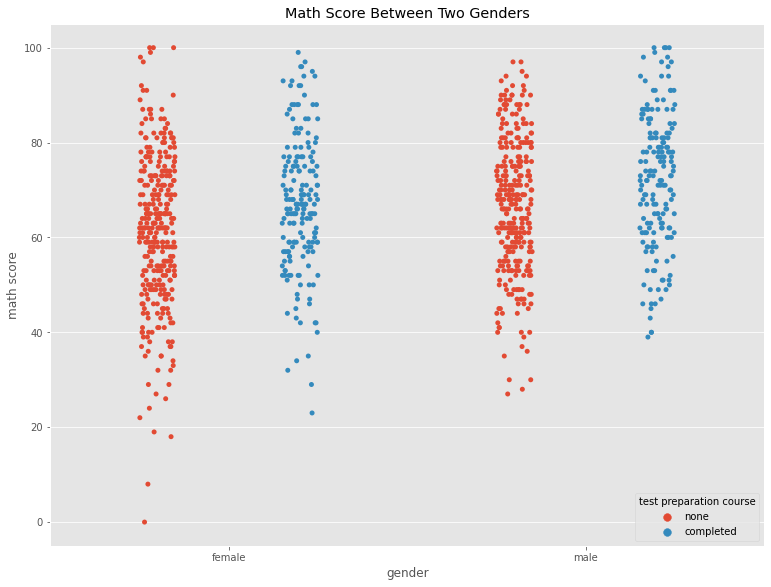

In [ ]:
plt.figure(figsize=[12.8, 9.6])
sns.stripplot(data=all_df, x='gender', y='math score', 
              hue='test preparation course', jitter=True, 
              dodge=True).set_title('Math Score Between Two Genders', color='black')

Text(0.5, 1.0, 'Reading Score Between Two Genders')

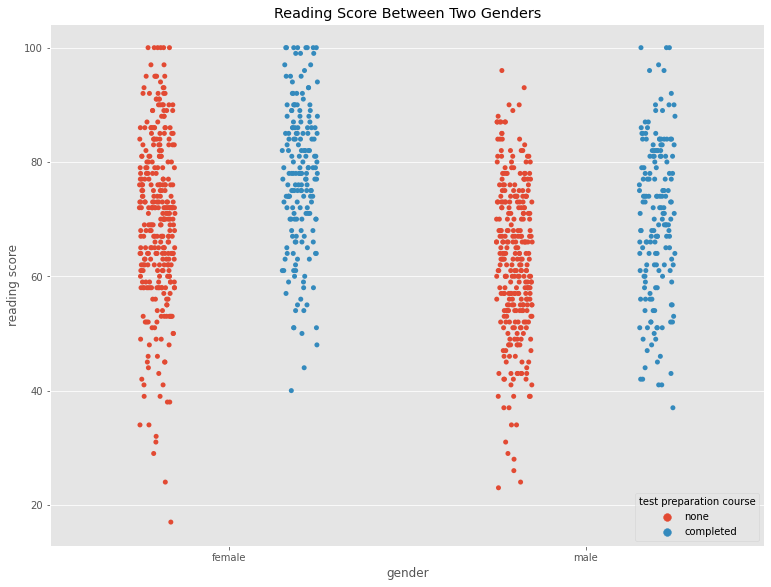

In [ ]:
plt.figure(figsize=[12.8, 9.6])
sns.stripplot(data=all_df, x='gender', y='reading score', 
              hue='test preparation course', jitter=True, 
              dodge=True).set_title('Reading Score Between Two Genders', color='black')

Text(0.5, 1.0, 'Writing Score Between Two Genders')

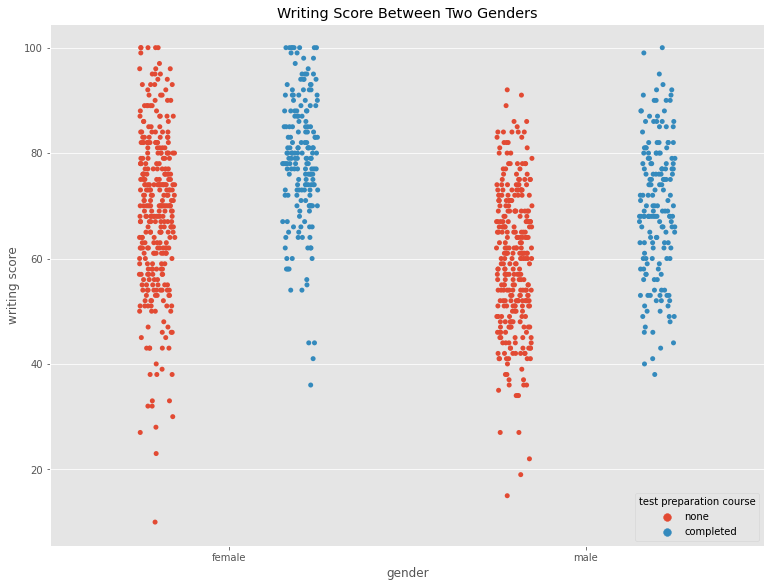

In [ ]:
plt.figure(figsize=[12.8, 9.6])
sns.stripplot(data=all_df, x='gender', y='writing score', 
              hue='test preparation course', jitter=True, 
              dodge=True).set_title('Writing Score Between Two Genders', color='black')

## **1. Analysis Male Students**

In [ ]:
male_df = all_df.loc[all_df['gender'] == 'male']
male_df.describe()

,math score,reading score,writing score
count,482.000000,482.000000,482.000000
mean,68.728216,65.473029,63.311203
std,14.356277,13.931832,14.113832
min,27.000000,23.000000,15.000000
25%,59.000000,56.000000,53.000000
50%,69.000000,66.000000,64.000000
75%,79.000000,75.000000,73.750000
max,100.000000,100.000000,100.000000


In [ ]:
has_degree = ["bachelor's degree", "master's degree", "associate's degree"]
PE_degree_male_df = male_df[male_df['parental level of education'].isin(has_degree)]

college = ['some college']
PE_college_male_df = male_df[male_df['parental level of education'].isin(college)]

school = ['high school', 'some high school']
PE_school_male_df = male_df[male_df['parental level of education'].isin(school)]

### **Parental Level Of Education**

#### **Summary Statistics**

In [ ]:
print('Summary Statistics Of Male Data With Parental Education Degree')
PE_degree_male_df.describe()

Summary Statistics Of Male Data With Parental Education Degree


,math score,reading score,writing score
count,184.000000,184.000000,184.000000
mean,71.217391,68.342391,66.978261
std,14.475777,13.332533,13.881606
min,37.000000,37.000000,35.000000
25%,61.000000,58.000000,57.000000
50%,72.000000,68.000000,68.000000
75%,81.250000,78.000000,77.000000
max,100.000000,100.000000,100.000000


In [ ]:
print('Summary Statistics Of Male Data With Parental Education College')
PE_college_male_df.describe()

Summary Statistics Of Male Data With Parental Education College


,math score,reading score,writing score
count,108.000000,108.000000,108.000000
mean,69.009259,64.990741,63.148148
std,14.774628,14.456183,14.716521
min,28.000000,23.000000,19.000000
25%,59.000000,57.000000,53.750000
50%,69.000000,63.500000,62.500000
75%,79.000000,76.250000,73.250000
max,100.000000,97.000000,99.000000


In [ ]:
print('Summary Statistics Of Male Data With Parental Education School')
PE_school_male_df.describe()

Summary Statistics Of Male Data With Parental Education School


,math score,reading score,writing score
count,190.000000,190.000000,190.000000
mean,66.157895,62.968421,59.852632
std,13.613575,13.750962,13.139035
min,27.000000,24.000000,15.000000
25%,57.000000,52.250000,51.000000
50%,67.000000,64.000000,60.500000
75%,75.000000,73.000000,69.000000
max,94.000000,91.000000,87.000000


Text(0.5, 1.0, 'Male Data With Parental Education Degree')

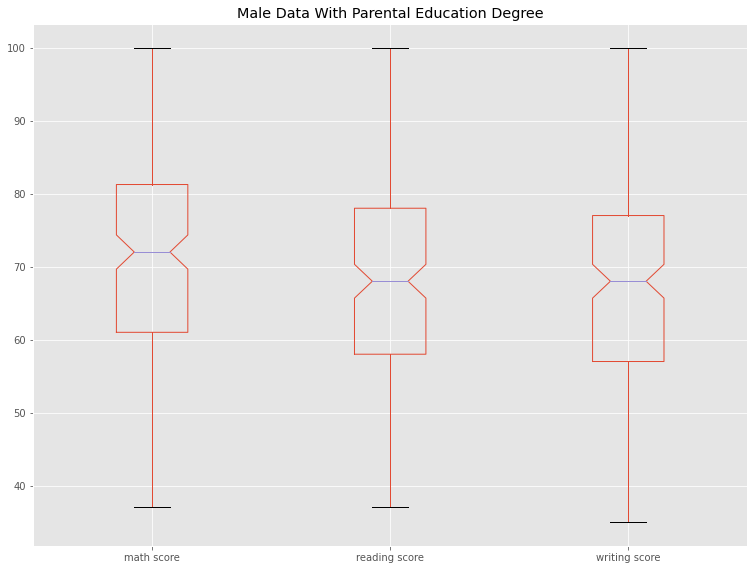

In [ ]:
plt.figure(figsize=[12.8, 9.6])
PE_degree_male_df.boxplot(column=['math score', 'reading score', 'writing score'],
                          notch=True)
plt.title('Male Data With Parental Education Degree')

Text(0.5, 1.0, 'Male Data With Parental Education Collage')

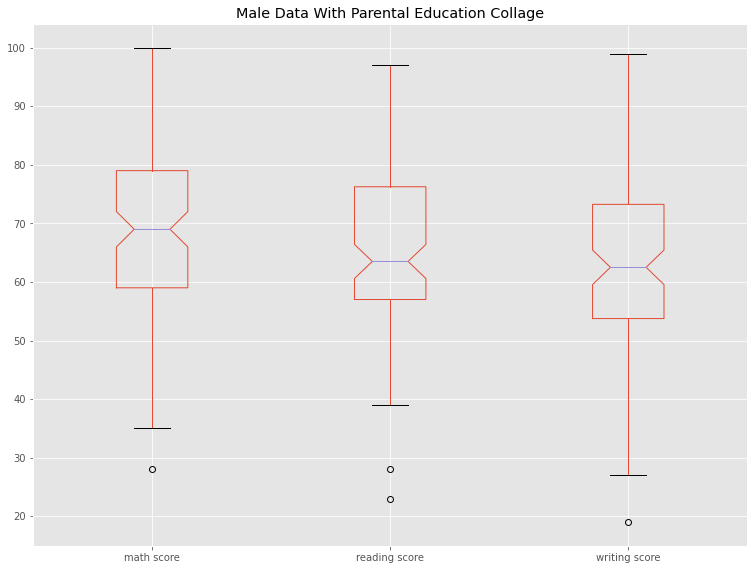

In [ ]:
plt.figure(figsize=[12.8, 9.6])
PE_college_male_df.boxplot(column=['math score', 'reading score', 'writing score'],
                          notch=True)
plt.title('Male Data With Parental Education Collage')

Text(0.5, 1.0, 'Male Data With Parental Education School')

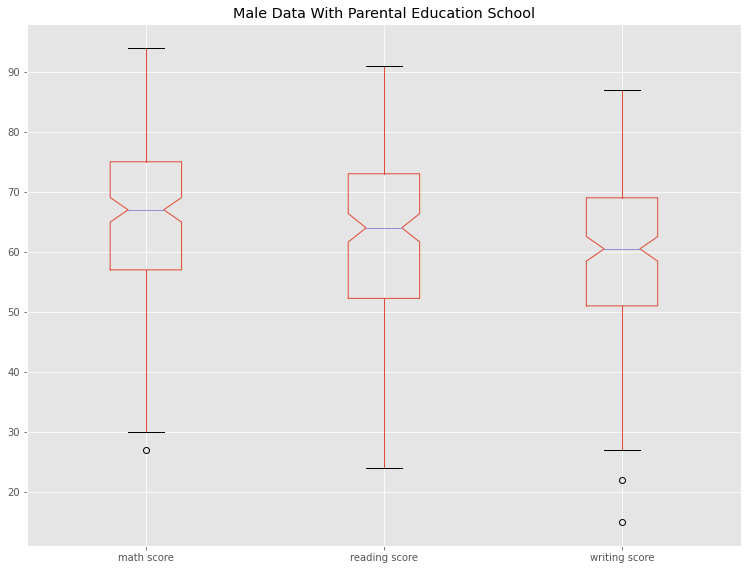

In [ ]:
plt.figure(figsize=[12.8, 9.6])
PE_school_male_df.boxplot(column=['math score', 'reading score', 'writing score'],
                          notch=True)
plt.title('Male Data With Parental Education School')

#### **Visualizing Score Data**

In [ ]:
def ToInterval(pdSeries, interval) :
  pds_index = list()
  pds_values = list()
  i = interval

  while i <= 100 :
    i2 = i-interval
    v0 = pdSeries[pdSeries.index <= i]
    pds_index.append(str(i2) + "-" + str(i))
    pds_values.append(v0.loc[v0.index > i2].sum())
    i += interval
  
  return pd.Series(data=pds_values, index=pds_index)

In [ ]:
math_pe_degree_male = PE_degree_male_df['math score'].value_counts(sort=False)
mdm = ToInterval(math_pe_degree_male, 10)

reading_pe_degree_male = PE_degree_male_df['reading score'].value_counts(sort=False)
rdm = ToInterval(reading_pe_degree_male, 10)

writing_pe_degree_male = PE_degree_male_df['writing score'].value_counts(sort=False)
wdm = ToInterval(writing_pe_degree_male, 10)

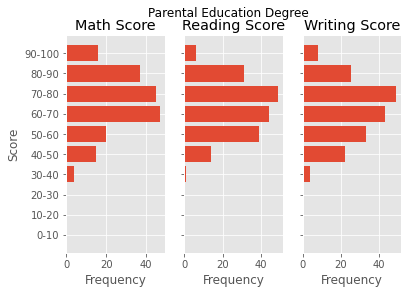

In [ ]:
fig, axs = plt.subplots(1, 3)
fig.suptitle('Parental Education Degree')
axs[0].barh(mdm.index, mdm.values)
axs[0].set_title('Math Score')
axs[1].barh(rdm.index, rdm.values)
axs[1].set_title('Reading Score')
axs[2].barh(wdm.index, wdm.values)
axs[2].set_title('Writing Score')

for ax in axs.flat:
    ax.set(xlabel='Frequency', ylabel='Score')
    ax.label_outer()

In [ ]:
math_pe_college_male = PE_college_male_df['math score'].value_counts()
mcm = ToInterval(math_pe_college_male, 10)

reading_pe_college_male = PE_college_male_df['reading score'].value_counts()
rcm = ToInterval(reading_pe_college_male, 10)

writing_pe_college_male = PE_college_male_df['writing score'].value_counts()
wcm = ToInterval(writing_pe_college_male, 10)

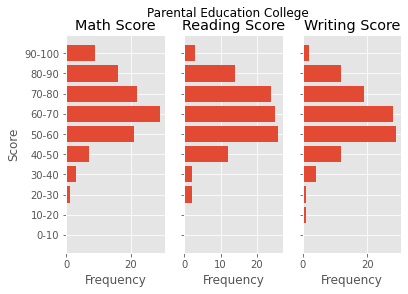

In [ ]:
fig, axs = plt.subplots(1, 3)
fig.suptitle('Parental Education College')
axs[0].barh(mcm.index, mcm.values)
axs[0].set_title('Math Score')
axs[1].barh(rcm.index, rcm.values)
axs[1].set_title('Reading Score')
axs[2].barh(wcm.index, wcm.values)
axs[2].set_title('Writing Score')

for ax in axs.flat :
  ax.set(xlabel='Frequency', ylabel='Score')
  ax.label_outer()

In [ ]:
math_pe_school_male = PE_school_male_df['math score'].value_counts()
msm = ToInterval(math_pe_school_male, 10)

reading_pe_school_male = PE_school_male_df['reading score'].value_counts()
rsm = ToInterval(math_pe_school_male, 10)

writing_pe_school_male = PE_school_male_df['writing score'].value_counts()
wsm = ToInterval(writing_pe_school_male, 10)

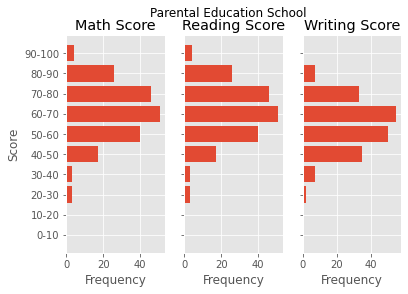

In [ ]:
fig, axs = plt.subplots(1,3)
fig.suptitle('Parental Education School')
axs[0].barh(msm.index, msm.values)
axs[0].set_title('Math Score')
axs[1].barh(rsm.index, rsm.values)
axs[1].set_title('Reading Score')
axs[2].barh(wsm.index, wsm.values)
axs[2].set_title('Writing Score')

for ax in axs.flat :
  ax.set(xlabel='Frequency', ylabel='Score')
  ax.label_outer()

## **2. Analysis Female Students**

In [ ]:
female_df = all_df.loc[all_df['gender'] == 'female']
female_df.describe()

,math score,reading score,writing score
count,518.000000,518.000000,518.000000
mean,63.633205,72.608108,72.467181
std,15.491453,14.378245,14.844842
min,0.000000,17.000000,10.000000
25%,54.000000,63.250000,64.000000
50%,65.000000,73.000000,74.000000
75%,74.000000,83.000000,82.000000
max,100.000000,100.000000,100.000000


### **Parental Level Of Education**

In [ ]:
PE_degree_female_df = female_df[female_df['parental level of education'].isin(has_degree)]

PE_college_female_df = female_df[female_df['parental level of education'].isin(college)]

PE_school_female_df = female_df[female_df['parental level of education'].isin(school)]

#### **Summary Statistics**

In [ ]:
print('Summary Statistics Of Female Data With Parental Education Degree')
PE_degree_female_df.describe()

Summary Statistics Of Female Data With Parental Education Degree


,math score,reading score,writing score
count,215.000000,215.000000,215.000000
mean,66.367442,75.497674,75.893023
std,15.209437,13.810085,13.743399
min,26.000000,31.000000,38.000000
25%,55.000000,65.000000,67.000000
50%,65.000000,76.000000,76.000000
75%,77.000000,86.000000,86.500000
max,100.000000,100.000000,100.000000


In [ ]:
print('Summary Statistics Of Female Data With Parental Education College')
PE_college_female_df.describe()

Summary Statistics Of Female Data With Parental Education College


,math score,reading score,writing score
count,118.00000,118.000000,118.000000
mean,65.40678,73.550847,74.050847
std,13.71395,12.392166,13.343488
min,19.00000,38.000000,32.000000
25%,58.00000,65.250000,66.000000
50%,65.50000,74.000000,74.500000
75%,74.00000,83.000000,83.000000
max,100.00000,100.000000,99.000000


In [ ]:
print('Summary Statistics Of Female Data With Parental Education School')
PE_school_female_df.describe()

Summary Statistics Of Female Data With Parental Education School


,math score,reading score,writing score
count,185.000000,185.000000,185.000000
mean,59.324324,68.648649,67.475676
std,16.007902,15.340371,15.681986
min,0.000000,17.000000,10.000000
25%,49.000000,59.000000,59.000000
50%,61.000000,70.000000,71.000000
75%,70.000000,80.000000,79.000000
max,99.000000,100.000000,100.000000


Text(0.5, 1.0, 'Female Data With Parental Education Degree')

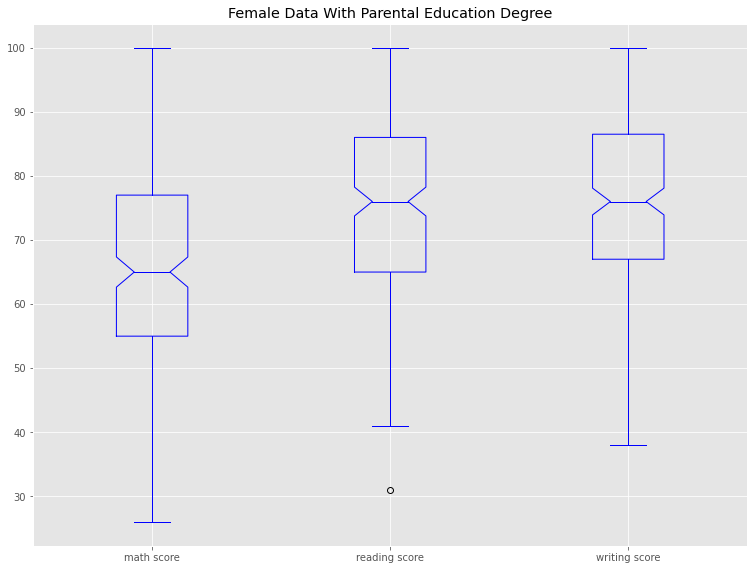

In [ ]:
plt.figure(figsize=[12.8, 9.6])
PE_degree_female_df.boxplot(column=['math score', 'reading score', 'writing score'],
                            notch=True, color='b')
plt.title('Female Data With Parental Education Degree')

Text(0.5, 1.0, 'Female Data With Parental Education Collage')

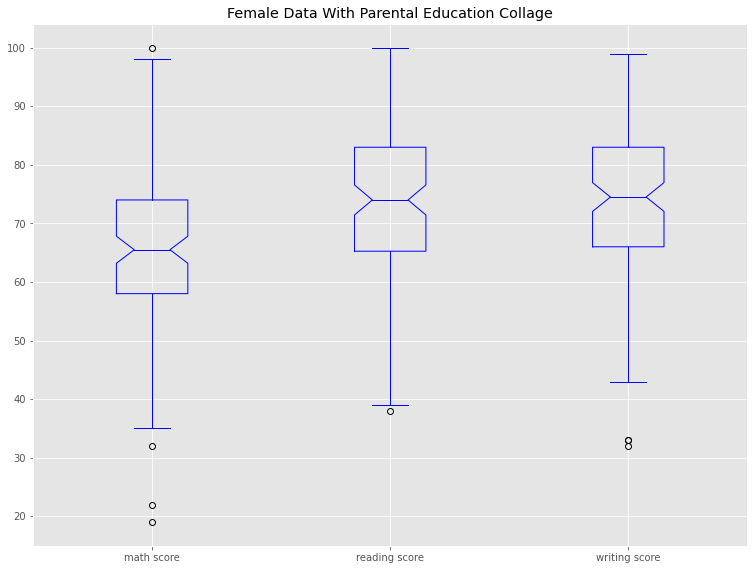

In [ ]:
plt.figure(figsize=[12.8, 9.6])
PE_college_female_df.boxplot(column=['math score', 'reading score', 'writing score'],
                            notch=True, color='b')
plt.title('Female Data With Parental Education Collage')

Text(0.5, 1.0, 'Female Data With Parental Education School')

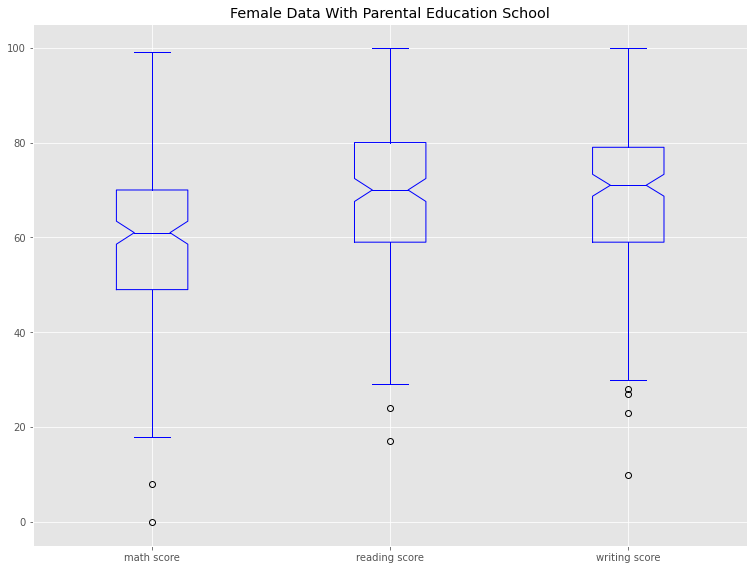

In [ ]:
plt.figure(figsize=[12.8, 9.6])
PE_school_female_df.boxplot(column=['math score', 'reading score', 'writing score'],
                            notch=True, color='b')
plt.title('Female Data With Parental Education School')

#### **Visualizing Score Data**

In [ ]:
math_pe_degree_female = PE_degree_female_df['math score'].value_counts(sort=False)
mdf = ToInterval(math_pe_degree_female, 10)

reading_pe_degree_female = PE_degree_female_df['reading score'].value_counts(sort=False)
rdf = ToInterval(reading_pe_degree_female, 10)

writing_pe_degree_female = PE_degree_female_df['writing score'].value_counts(sort=False)
wdf = ToInterval(writing_pe_degree_female, 10)

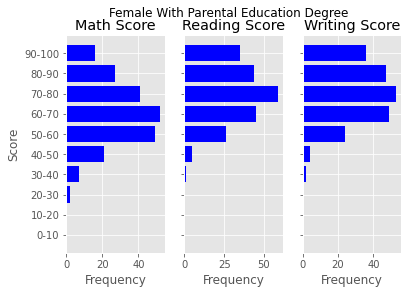

In [ ]:
fig, axs = plt.subplots(1, 3)
fig.suptitle('Female With Parental Education Degree')
axs[0].barh(mdf.index, mdf.values, color='b')
axs[0].set_title('Math Score')
axs[1].barh(rdf.index, rdf.values, color='b')
axs[1].set_title('Reading Score')
axs[2].barh(wdf.index, wdf.values, color='b')
axs[2].set_title('Writing Score')

for ax in axs.flat:
    ax.set(xlabel='Frequency', ylabel='Score')
    ax.label_outer()

In [ ]:
math_pe_college_female = PE_college_female_df['math score'].value_counts()
mcf = ToInterval(math_pe_college_female, 10)

reading_pe_college_female = PE_college_female_df['reading score'].value_counts()
rcf = ToInterval(reading_pe_college_female, 10)

writing_pe_college_female = PE_college_female_df['writing score'].value_counts()
wcf = ToInterval(writing_pe_college_female, 10)

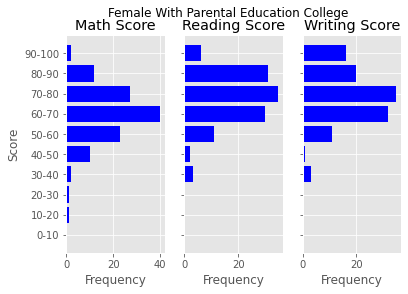

In [ ]:
fig, axs = plt.subplots(1, 3)
fig.suptitle('Female With Parental Education College')
axs[0].barh(mcf.index, mcf.values, color='b')
axs[0].set_title('Math Score')
axs[1].barh(rcf.index, rcf.values, color='b')
axs[1].set_title('Reading Score')
axs[2].barh(wcf.index, wcf.values, color='b')
axs[2].set_title('Writing Score')

for ax in axs.flat :
  ax.set(xlabel='Frequency', ylabel='Score')
  ax.label_outer()

In [ ]:
math_pe_school_female = PE_school_female_df['math score'].value_counts()
msf = ToInterval(math_pe_school_female, 10)

reading_pe_school_female = PE_school_female_df['reading score'].value_counts()
rsf = ToInterval(math_pe_school_female, 10)

writing_pe_school_female = PE_school_female_df['writing score'].value_counts()
wsf = ToInterval(writing_pe_school_female, 10)

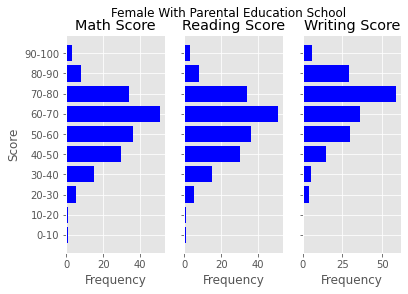

In [ ]:
fig, axs = plt.subplots(1,3)
fig.suptitle('Female With Parental Education School')
axs[0].barh(msf.index, msf.values, color='b')
axs[0].set_title('Math Score')
axs[1].barh(rsf.index, rsf.values, color='b')
axs[1].set_title('Reading Score')
axs[2].barh(wsf.index, wsf.values, color='b')
axs[2].set_title('Writing Score')

for ax in axs.flat :
  ax.set(xlabel='Frequency', ylabel='Score')
  ax.label_outer()